In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
import periodictable as ptable

### Stable Layer in the Core Caused by Paritioning of H and Si Across the CMB

Consider a layer below the core-mantle boundary (CMB) that is stable because it is compositionally light.

Assume the thickness of the layer is $D$. Assume that density gradients are linear, so the perturbation of the density of the layer with respect to the adiabatic and well-mixed state is $\partial \rho' / \partial r$. The average density anomaly relative to the bulk core is then $\Delta \rho_{av} '$, where $\rho '$ varies from 0 kg/m$^3$ at the base of the layer to $2\Delta\rho_{av}'$ at the top of the layer. Putting these definitions together, $\partial \rho' / \partial r$ $\sim$ $2\Delta\rho_{av}'/D$.

Adding either Si or H to pure Fe will lead to an alloy with lower density. The total density perturbation is $\Delta \rho_{av} '$ = $\Delta \rho_H'$ + $\Delta \rho_{Si}'$. Using the calculations reported in Figure 3 of Umemoto and Hirose (2020, EPSL), we can define:

$\Delta \rho_H'$ = ($-$1200 kg/m$^3$)$\Delta w_H$

and

$\Delta \rho_{Si}'$ = ($-$100 kg/m$^3$)$\Delta w_{Si}$,

where $\Delta w_H$ and $\Delta w_{Si}$ are the changes in the weight percentages of H and Si, respectively, in the alloy. We can relate these terms to the total mass added or subtracted from the stable layer by chemical reactions at the CMB:

$\Delta w_H = \frac{300\Delta M_H}{4\pi[R_C^3 - (R_C - D)^3]\rho}$ 

and

$\Delta w_{Si} = \frac{300\Delta M_{Si}}{4\pi[R_C^3 - (R_C - D)^3]\rho}$,

where $R_C$ = 3480 km is the radius of the core and $\rho$ $\sim$ 9906 kg/m$^3$ is the density at the CMB.

Based on the experimental results, we assume that $\Delta M_{Si}$ = -7$\Delta M_H$, i.e., that 2.38 kg of Si are removed from the core for every 1 kg of H added to the core.


Our goal is to calculate the Brunt-Vaisala period for a stable layer at the top of the core given $D$ and $\Delta M_H$:

$T_{BV} = \frac{2\pi}{N} = 2\pi \left(-\frac{g}{\rho} \frac{\partial\rho'}{\partial r}  \right)^{-1/2}$

where $g$ $\sim$ 10.7 m/s$^2$ is the gravitational acceleration at the CMB .


In [2]:
def calc_stability(D, Delta_M_H, verbose=False):
    g = 10.7          # Gravitational acceleration at the CMB (m/s2)
    rho = 1e4         # Density of the bulk core near the CMB (kg/m3)
    R_C = 3480e3      # Radius of the core (m)
    
    M_L = (4/3) * np.pi * (R_C**3 - (R_C - D)**3) * rho      # Mass of the stable layer (kg)
    
    Delta_M_Si = -7. * Delta_M_H   # Mass of Si removed from the core (kg)
        
    Delta_w_H = 100*Delta_M_H/M_L    # Change in the weight percentage of H in the stable layer
    Delta_w_Si = 100*Delta_M_Si/M_L  # Change in the weight percentage of Si in the stable layer
        
    Delta_rho_H = -1200*Delta_w_H    # Density perturbation from adding H (kg/m3)
    Delta_rho_Si = -100*Delta_w_Si   # Density perturbation from removing Si (kg/m3)
    if verbose:
        print(Delta_rho_H, Delta_rho_Si)

        
    Delta_rho_av = Delta_rho_H + Delta_rho_Si # Average density perturbation in the stable layer
        
    d_rho_d_r = 2*Delta_rho_av/D     # Gradient of density perturbation (kg/m3/m)
        
    T_BV = 2*np.pi*(-g/rho * d_rho_d_r)**(-0.5)   # Brunt-Vaisala period (seconds)
    T_BV_hr = T_BV/3600                           # Change units from seconds to hours
        
    return Delta_rho_av, T_BV_hr,

In [3]:
N_D = 100 #400   # Number of values of D to sample
N_H = 1000 # 300   # Number of values of Delta_M_H to sample

D_all = 1e3*np.linspace(60, 500, N_D)              # Thicknesses of the stable layer (m)
Delta_M_H_all = np.linspace(5e17, 5e20, N_H)   # Masses of hydrogen added to the core (kg)

T_BV_all = np.zeros((N_D, N_H))       # Empty array to store the Brunt-Vaisala periods
Delta_rho_all = np.zeros((N_D, N_H))  # Empty array to store the average density perturbations

for ii, D in enumerate(D_all):
    for jj, Delta_M_H in enumerate(Delta_M_H_all):
        
        Delta_rho_av, T_BV_hr = calc_stability(D, Delta_M_H)    # Calculate the density/stability gradients
        
        # Store calculated values
        T_BV_all[ii,jj] = T_BV_hr               # Brunt-Vaisala period (hours)
        Delta_rho_all[ii,jj] = Delta_rho_av     # Average density perturbation (kg/m3)
     

In [4]:
D_all.shape

(100,)

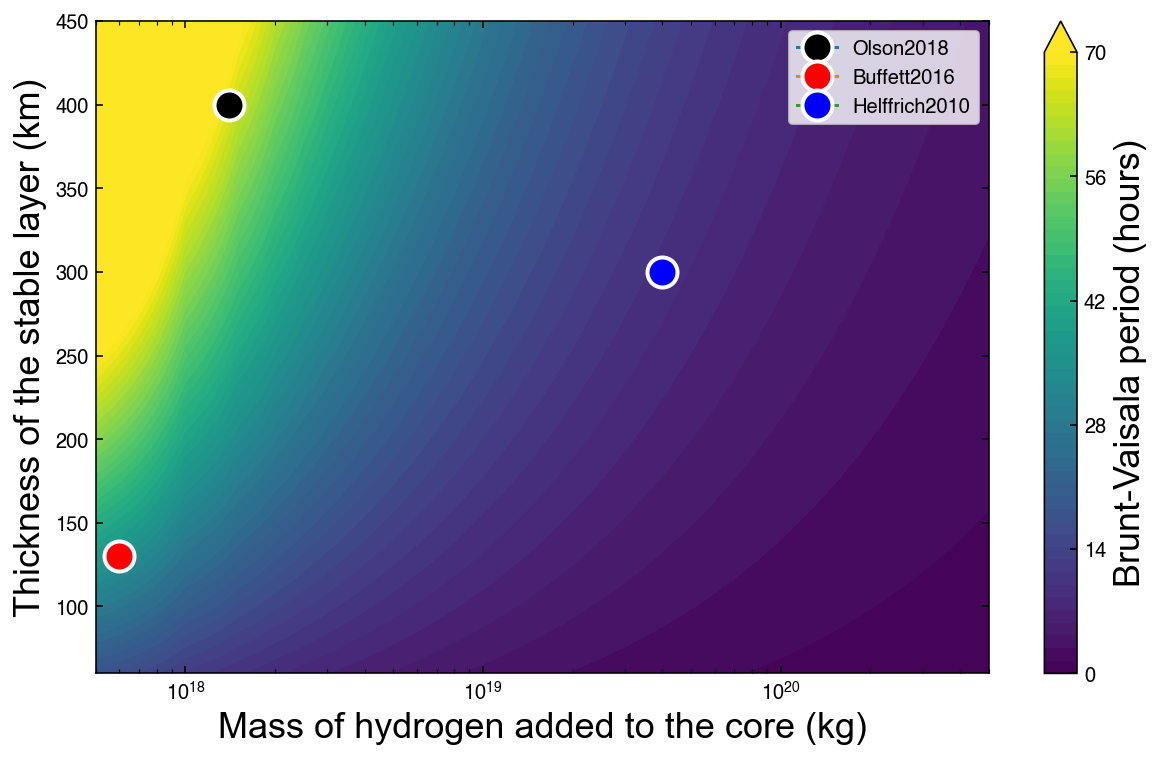

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

fs = 18
fn = 'Arial'

max_level = 70

levels = np.linspace(0, max_level)

plt.contourf(Delta_M_H_all, D_all/1e3, T_BV_all,
             levels=levels, extend='max')

plt.xscale('log')

#cbar = plt.colorbar(ticks=(0, 12, 24, 36, 48))
cbar = plt.colorbar(ticks=np.linspace(0, max_level, 6))
cbar.set_label('Brunt-Vaisala period (hours)', 
               fontsize=fs, fontname=fn)

plt.xlabel('Mass of hydrogen added to the core (kg)',
           fontsize=fs, fontname=fn)
plt.ylabel('Thickness of the stable layer (km)',
           fontsize=fs, fontname=fn)

plt.plot(1.4e18, 400, marker='o', mfc='k', 
         mec='w', ms=15, mew=2,
         label='Olson2018')
plt.plot(6e17, 130, marker='o', mfc='r', 
         mec='w', ms=15, mew=2, 
         label='Buffett2016')
plt.plot(4e19, 300, marker='o', mfc='b', 
         mec='w', ms=15, mew=2, 
         label='Helffrich2010')

plt.ylim(60, 450)

#plt.rcParams['xtick.labelsize'] = fs
#plt.rcParams['ytick.labelsize'] = fs

plt.legend()

plt.savefig('Figure_stableLayerHydrogen.pdf', bbox_inches = "tight")

plt.show()

## Stable Layer Models

Helffrich and Kaneshima (2010): T_BV ~ 1.6 - 3.4 hours, D < 400 km.
Buffett et al. (2016): T_BV ~ 24 hours, D ~ 130-140 km

# Calculation of H at the CMB

In [6]:
m_subducted_water = 1.e12 #kg/yr
delta_t_subduction = 4.e9
efficiency = 0.09

In [7]:
m_subducted_water * delta_t_subduction * efficiency

3.6e+20

In [8]:
def cal_m_water_cmb(delta_t, eff):
    return m_subducted_water * delta_t * eff

In [9]:
cal_m_water_cmb(delta_t_subduction, efficiency)

3.6e+20

In [10]:
n_t = 100#200    # Number of time sample
n_eff = 50 #100   # Number of efficiency sample

delta_t = 1e9*np.linspace(0.95, 4.55, n_t)              # Thicknesses of the stable layer (m)
eff = np.linspace(0.001, 1, n_eff)   # Masses of hydrogen added to the core (kg)

m_all = np.zeros((n_t, n_eff))       # Empty array to store the Brunt-Vaisala periods

for ii, t in enumerate(delta_t):
    for jj, e in enumerate(eff):
        
        m = cal_m_water_cmb(t, e)    # Calculate the density/stability gradients
        
        # Store calculated values
        m_all[ii,jj] = m * ptable.formula('2H').mass / ptable.formula('H2O').mass    # Average density perturbation (kg/m3)


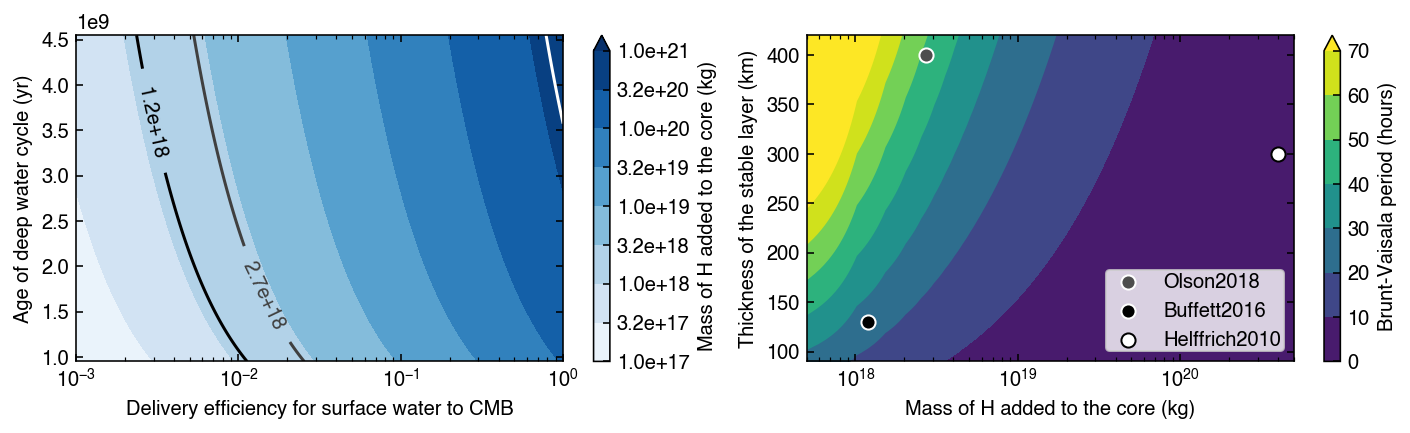

In [11]:
import matplotlib

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

#fs = 18
#fn = 'Arial'

#levels = np.linspace(min_level, max_level)

ctr1 = axs[0].contourf(eff, delta_t, m_all,
            np.logspace(17,21, 9),
            extend='max', 
            cmap='Blues', #alpha=0.7,
            locator=ticker.LogLocator())

axs[0].set_xscale('log')

#cbar = plt.colorbar(ticks=(0, 12, 24, 36, 48))
#cbar = plt.colorbar(ticks=(min_level, max_level, 6))
cbar = plt.colorbar(ctr1, ax=axs[0], format='%.1e')
cbar.set_label('Mass of H added to the core (kg)') 
#               fontsize=fs, fontname=fn)

axs[0].set_xlabel('Delivery efficiency for surface water to CMB')
axs[0].set_ylabel('Age of deep water cycle (yr)')

#plt.ylim(60, 450)
#axs[0].rcParams['xtick.labelsize'] = fs
#axs[0].rcParams['ytick.labelsize'] = fs

ctl = axs[0].contour(eff, delta_t, m_all,
            levels = (1.2e18, 2.7e18, 4.0e20), 
               colors=('k', '0.25', 'w'))
    
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
def fmt(x):
    s = f"   {x:.1e}   "
#    if s.endswith("0"):
#        s = f" {x:.0e}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

axs[0].clabel(ctl, ctl.levels, fmt=fmt, inline_spacing=0,
              fontsize=10)

max_level = 70

levels = np.linspace(0, max_level, 8)

ctr2 = axs[1].contourf(Delta_M_H_all, D_all/1e3, T_BV_all,
             levels=levels, extend='max')

for c in ctr2.collections:
    c.set_edgecolor("face")

axs[1].set_xscale('log')

#cbar = plt.colorbar(ticks=(0, 12, 24, 36, 48))
cbar1 = plt.colorbar(ctr2, ax=axs[1], )
#                     ticks=np.linspace(0, max_level, 6))
cbar1.set_label('Brunt-Vaisala period (hours)')

axs[1].set_xlabel('Mass of H added to the core (kg)')
axs[1].set_ylabel('Thickness of the stable layer (km)')

axs[1].scatter(2.7e18, 400, marker='o', c='0.3', 
         ec='w', s=50, lw=1,
         label='Olson2018')
axs[1].scatter(1.2e18, 130, marker='o', c='k', 
         ec='w', s=50, lw=1, 
         label='Buffett2016')
axs[1].scatter(4e20, 300, marker='o', c='w', 
         ec='k', s=50, lw=1, 
         label='Helffrich2010')

axs[1].set_ylim(90, 420)

axs[1].legend(borderpad=0.1, loc=4)
plt.savefig('f-model.pdf')